**Imersão Dados Alura (2)**
Rosemeire Deconti
20 de Outubro de 2020

**Definindo bibliotecas**

In [ ]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# Releasing matplotlib to work interactively
%matplotlib inline

**Obtendo dados da amostra de dados**

In [ ]:
# Defining source of data (sample provided by Alura)
source = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"

# Reading in the data
dataFrameSample = pd.read_csv(source)

# Checking number of lines and columns from dataFrameSample
shape = dataFrameSample.shape
print ("Total de registros e colunas - AMOSTRA", shape)

Total de registros e colunas - AMOSTRA (127380, 136)


**Desafio 01: Pegar a amostra completa dos alunos de 13 e 14 anos (MEGA DESAFIO)**

In [ ]:
# Defining source of data (all Data From Enen 2019)
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import plotly.express as px

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Reading in the data limited by columnsList (due Google Colab RAM limitation is necessary to define which columns can be used)
columnsList = ['NU_IDADE', 'SG_UF_RESIDENCIA']
dataFrameTotal = pd.read_csv('/content/drive/My Drive/Dataset/MICRODADOS_ENEM_2019.csv', sep=';', encoding='ISO-8859-1', usecols=columnsList)

# Checking number of lines and columns from dataFrameSample
shape = dataFrameTotal.shape
print ("Total de registros e colunas - ENEN 2019", shape)

Total de registros e colunas - ENEN 2019 (5095270, 2)


In [ ]:
dataFrameTotal.query("NU_IDADE <= 14")["SG_UF_RESIDENCIA"].value_counts()

PA    509
CE    467
PE    458
MA    457
BA    415
SP    406
PB    395
MG    345
GO    303
SE    246
PI    227
PR    166
MT    154
AM    139
TO    124
DF    109
RJ    108
RO     98
MS     88
SC     78
RN     76
AP     62
RS     59
AL     56
AC     51
ES     47
RR     20
Name: SG_UF_RESIDENCIA, dtype: int64

Número de inscritos com menos de 15 anos 5663


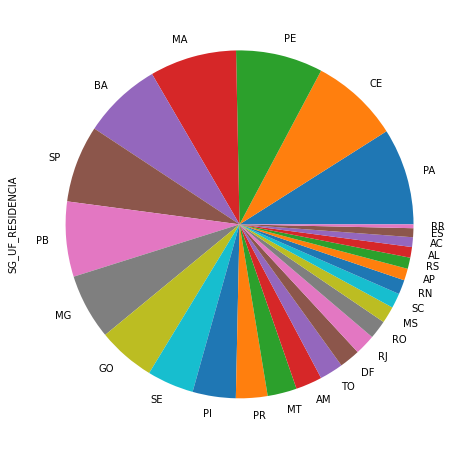

In [ ]:
# Graph pie
subscribersByAge = dataFrameTotal.query("NU_IDADE <= 14")
subscribersByAge["SG_UF_RESIDENCIA"].value_counts().plot.pie(figsize=(10,8))

totalSubscribersLessThan15 = len(subscribersByAge)

print ("Número de inscritos com menos de 15 anos", totalSubscribersLessThan15)

Text(0.5, 1.0, 'Número de inscritos com menos de 15 anos')

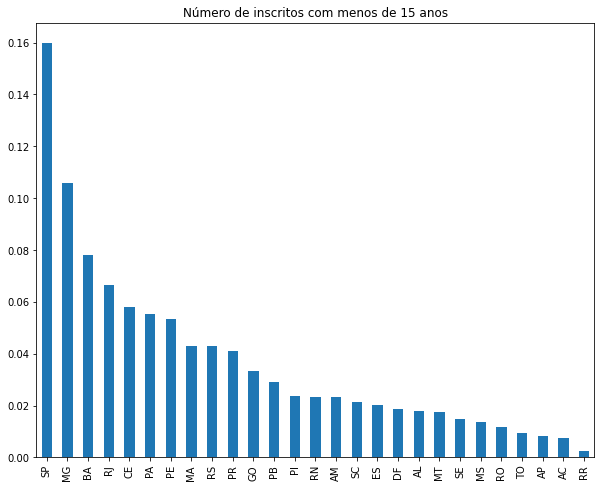

In [ ]:
dataFrameTotal["SG_UF_RESIDENCIA"].value_counts(normalize = True).plot.bar(figsize=(10,8))
plt.title("Número de inscritos com menos de 15 anos")

**Desafio 02: Aumentar a amostra para alunos menor de idade e comparar a proporção por estado.**

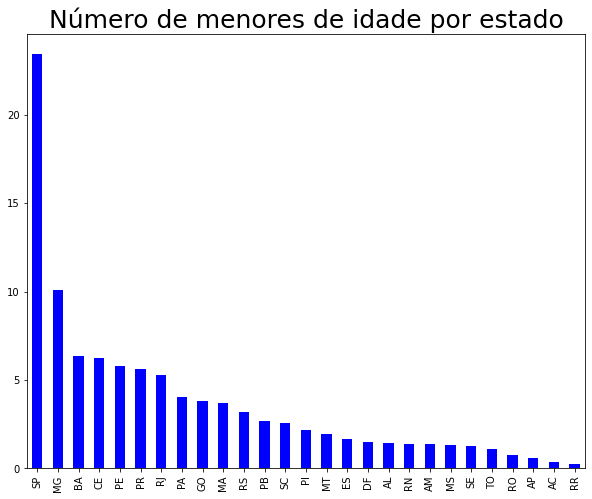

In [ ]:
# Obtain number of subscribers with age less than 18 and compare proportion by State
dataQueryAge = dataFrameSample.query("NU_IDADE < 18")["SG_UF_RESIDENCIA"].value_counts(normalize=True)*100

# Show list of data
dataQueryAge

# Setting graph data
plt.grid(True)
plt.title('Número de menores de idade por estado',fontsize = 25)
dataQueryAge.plot.bar(figsize=(10,8), color = ('blue'))

**Desafio 03: Criar uma função para plotar o boxplot do seaborn**

In [ ]:
# Defining a function to generate a graph
def graph(axisX,axisY,graphTitle):
  plt.figure(figsize=(10,6))
  sns.boxplot(x=axisX, y=axisY, data= dataFrameSample, order = renda_ordenada)
  plt.title(graphTitle)

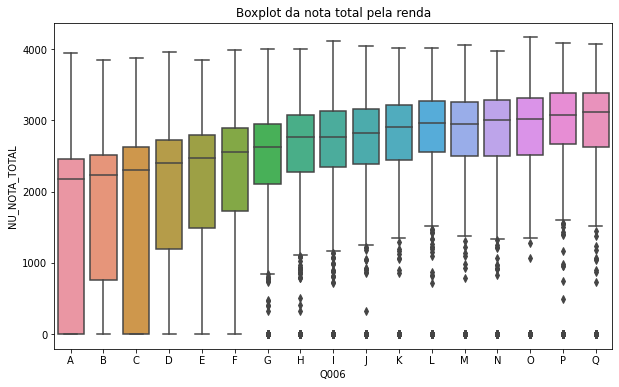

In [ ]:
# Test call function
 grafico("Q006", "NU_NOTA_TOTAL", "Boxplot da nota total pela renda" )

**Desafio 04: Verificar se quem zerou a prova foi eliminado ou não estava presente**

In [ ]:
# Understanding data dictionary 
# * TP_PRESENCA_CN (0 = faltou, 1 = presente, 2 = eliminado)
# * TP_PRESENCA_CH (0 = faltou, 1 = presente, 2 = eliminado)
# * TP_PRESENCA_LC (0 = faltou, 1 = presente, 2 = eliminado)
# * TP_PRESENCA_MT (0 = faltou, 1 = presente, 2 = eliminado)
# * NU_NOTA_CN
# * NU_NOTA_CH
# * NU_NOTA_LC
# * NU_NOTA_MT

listExamDegreeFields = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]
listExamsStatus = ["TP_PRESENCA_CN", "TP_PRESENCA_CH", "TP_PRESENCA_LC", "TP_PRESENCA_MT"]

dataSerie = dataFrameSample.query ("NU_NOTA_TOTAL == 0") [listExamsStatus].value_counts()
dataSerie


TP_PRESENCA_CN  TP_PRESENCA_CH  TP_PRESENCA_LC  TP_PRESENCA_MT
0               0               0               0                 28998
                2               2               0                   120
                1               1               0                    39
1               0               0               1                     3
                1               1               1                     2
dtype: int64

**Interpretação da lista:** 
> Quem zerou a prova não necessariamente foi eliminado ou não etava presente. Temos 120 casos em que o aluno estava presente e zerou a prova

**Desafio 05: Quem é eliminado tira zero ou será NaN (não teve registro de notas)**

In [ ]:
# Understanding data dictionary 
# * TP_PRESENCA_CN (0 = faltou, 1 = presente, 2 = eliminado)
# * TP_PRESENCA_CH (0 = faltou, 1 = presente, 2 = eliminado)
# * TP_PRESENCA_LC (0 = faltou, 1 = presente, 2 = eliminado)
# * TP_PRESENCA_MT (0 = faltou, 1 = presente, 2 = eliminado)
# * NU_NOTA_CN
# * NU_NOTA_CH
# * NU_NOTA_LC
# * NU_NOTA_MT

# Define list of exams degree to be considered
listExamsDegree = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]

# Define list of exams status depending on absent/not absent/eliminated)
listExamsStatus = ["TP_PRESENCA_CN", "TP_PRESENCA_CH", "TP_PRESENCA_LC", "TP_PRESENCA_MT"]

# Listing susbscribers "eliminated" from exams to check degree
dataSerieNaN = dataFrameSample.query("TP_PRESENCA_CH == 2" or "TP_PRESENCA_MT == 2" or "TP_PRESENCA_LC == 2" or "TP_PRESENCA_CN == 2")[listExamsDegree]

dataSerieNaN

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
77,NaN,NaN,NaN,NaN,NaN
396,NaN,NaN,NaN,NaN,NaN
446,NaN,NaN,NaN,NaN,NaN
609,NaN,NaN,NaN,NaN,NaN
728,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
124695,NaN,NaN,NaN,NaN,NaN
125216,NaN,NaN,NaN,NaN,NaN
125784,NaN,NaN,NaN,NaN,NaN
126769,NaN,NaN,NaN,NaN,NaN


**Interpretação da lista:** 
> Alunos com situação de presença igual a "2 - Eliminado" tem atribuição de nota igual a NaN

**Desafio 06: Verificar a proporção dos participantes de rendas mais altas e mais baixas como treineiro e não treineiro**

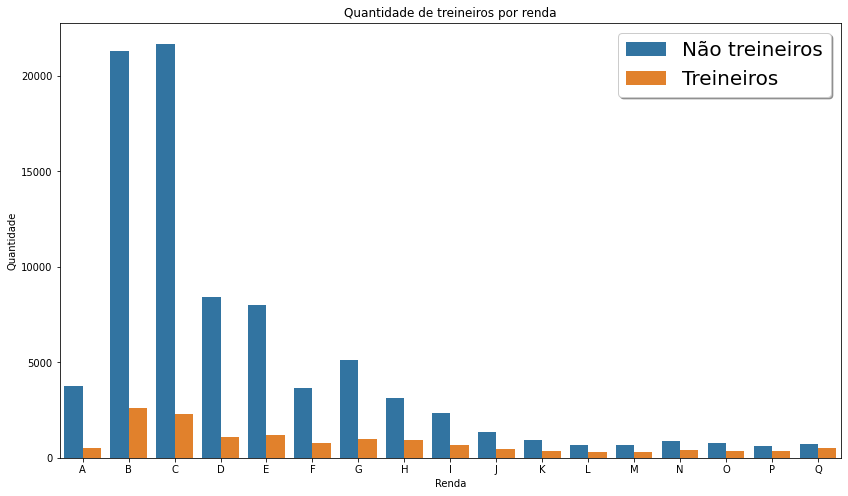

In [ ]:
# Getting monthly family income 
monthly_family_income = dataFrameSample["Q006"].unique()
monthly_family_income.sort()

# Define list of exams degree to be considered
listExamsDegree = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]

# Create a field to sum degree of each exams from list
dataFrameSample["NU_NOTA_TOTAL"] = dataFrameSample[listExamsDegree].sum(axis=1)
dataFrameSample.head()

# Discard exams wtih total grade equal zero
grade_greater_zero = dataFrameSample.query("NU_NOTA_TOTAL != 0")
grade_greater_zero.head()

# Generating graph
plt.figure(figsize=(14, 8))
graph = sns.countplot(x="Q006", hue ="IN_TREINEIRO", data = grade_greater_zero, order= monthly_family_income)
plt.title("Quantidade de treineiros por renda")
plt.ylabel("Quantidade")
plt.xlabel("Renda")
plt.legend(('Não treineiros', 'Treineiros'), loc='upper right', shadow = True,fontsize = 20)

**Interpretação do gráfico:** 
> Constatação: A quantidade de "Não treineiros" é bem maior que a quantidade de "Treineiros" nas faixas de renda mais baixas e aumenta conforme a renda aumenta também.
> Hipótese: Devido a renda "Não treineiros" não fazem a prova do Enem, pois, ela tem que ser paga.

**Desafio 07: Fazer o mesmo boxplot olhando para a questão 25 (tem internet ou não) e fazer uma reflexão sobre o assunto e o contexto de pandemia**

[Text(0, 0, 'Com Internet'), Text(0, 0, 'Sem Internet')]

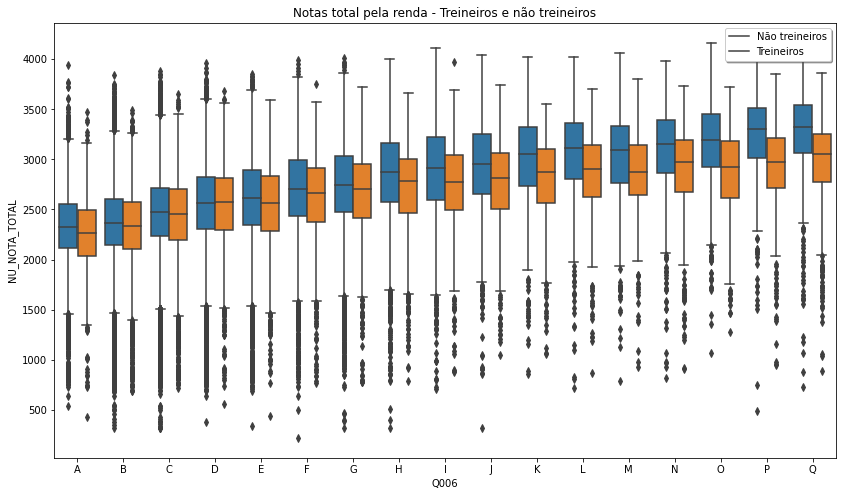

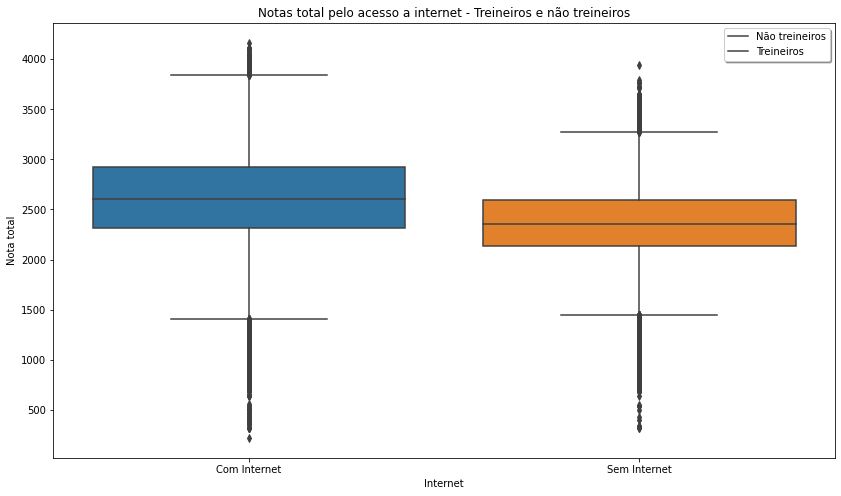

In [ ]:
# Getting monthly family income 
monthly_family_income = dataFrameSample["Q006"].unique()
monthly_family_income.sort()

# Define list of exams to be considered
listExams = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]

# Create a field to sum degree of each exams from list
dataFrameSample["NU_NOTA_TOTAL"] = dataFrameSample[listExams].sum(axis=1)
dataFrameSample.head()

# Discard exams wtih total grade equal zero
grade_greater_zero = dataFrameSample.query("NU_NOTA_TOTAL != 0")
grade_greater_zero.head()

# Generating graph 01
plt.figure(figsize=(14, 8))
sns.boxplot(x="Q006", y = "NU_NOTA_TOTAL", data = grade_greater_zero, hue = "IN_TREINEIRO", order = monthly_family_income)
plt.legend(('Não treineiros', 'Treineiros'), loc='upper right', shadow = True,fontsize = 10)
plt.title("Notas total pela renda - Treineiros e não treineiros")

# Generating graph 02
plt.figure(figsize=(14, 8))
graph = sns.boxplot(x="Q025", y = "NU_NOTA_TOTAL", data = grade_greater_zero, )
plt.title("Notas total pelo acesso a internet - Treineiros e não treineiros")
plt.ylabel("Nota total")
plt.xlabel("Internet")
plt.legend(('Não treineiros', 'Treineiros'), loc='upper right', shadow = True,fontsize = 10)
graph.set_xticklabels(["Com Internet", "Sem Internet"])


**Interpretação do gráfico:** 


> Constatação: Inscritos com acesso a Internet tiveram desempenho melhor do que os inscritos sem acesso a Internet.
> Hipótese: Inscritos com mais recursos tem melhor desempenho
> Consequencias da Pandemia: Sem aulas presenciais e falta de conexão com a Internet, provavelmente, aumentarão as discrepâncias atualmente encontradas.